# FIPS References

This notebook provides insights into the references of FIPS certificates.

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import logging
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

from sec_certs.dataset.fips import FIPSDataset
from collections import Counter
from pprint import pprint

# Typing imports
from pandas.core.frame import DataFrame, Series
from typing import Callable


#%matplotlib inline
#matplotlib.use("pgf")
sns.set_theme(style='white')
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 6.5
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["ytick.left"] = True
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.major.pad"] = 0
plt.rcParams["xtick.bottom"] = True
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.major.pad"] = 0
# plt.rcParams["pgf.texsystem"] = "pdflatex"
plt.rcParams["font.family"] = "serif"
# plt.rcParams["text.usetex"] = True
# plt.rcParams["pgf.rcfonts"] = False
plt.rcParams["axes.titlesize"] = 8
plt.rcParams["legend.handletextpad"] = 0.3
plt.rcParams["lines.markersize"] = 4
plt.rcParams["savefig.pad_inches"] = 0.01
sns.set_palette("deep")

In [2]:
dset = FIPSDataset.from_web_latest()

In [3]:
df = dset.to_pandas()

## Analysis of FIPS references

In [4]:
refs_columns: list[str] = [
    "cert_id",
    "status",
    "standard",
    "type",
    "level",
    "embodiment",
    "module_directly_referenced_by", 
    "module_indirectly_referenced_by",
    "module_directly_referencing",
    "module_indirectly_referencing",
    "policy_directly_referenced_by",
    "policy_indirectly_referenced_by",
    "policy_directly_referencing",
    "policy_indirectly_referencing",
]

### References EDA

In [5]:
refs_df = df[refs_columns]

In [6]:
refs_direct_eda_df = refs_df[refs_df["module_directly_referencing"].notna()]
refs_indirect_eda_df = refs_df[refs_df["module_indirectly_referencing"].notna()]

In [7]:
def process_references(df: DataFrame, reference_type: str, func: Callable[[list[int]], float]) -> float | int:
    return func([len(refs) for refs in df[reference_type]])

#### Direct module references

In [8]:
direct_reference_type: str = "module_directly_referencing"
total_directly_referencing_certs: int = refs_direct_eda_df.shape[0]
total_direct_references: int = process_references(refs_direct_eda_df, direct_reference_type, sum)
maximum_direct_references: int = process_references(refs_direct_eda_df, direct_reference_type, max)
minimum_direct_references: int = process_references(refs_direct_eda_df, direct_reference_type, min)
mean_direct_references: float = round(process_references(refs_direct_eda_df, direct_reference_type, np.mean), 2)
median_direct_references: float = process_references(refs_direct_eda_df, direct_reference_type, np.median)

print(f"Total directly referencing certs: {total_directly_referencing_certs}")
print(f"Total direct references among all certs: {total_direct_references}")
print(f"Maximum directly referenced certs at once: {maximum_direct_references}")
print(f"Minimum directly referenced certs at once: {minimum_direct_references}")
print(f"Mean of all direct references: {mean_direct_references}")
print(f"Median of all direct references: {median_direct_references}")

Total directly referencing certs: 474
Total direct references among all certs: 627
Maximum directly referenced certs at once: 8
Minimum directly referenced certs at once: 1
Mean of all direct references: 1.32
Median of all direct references: 1.0


#### Indirect module references

In [9]:
indirect_reference_type: str = "module_indirectly_referencing"
total_indirectly_referencing_certs: int = refs_indirect_eda_df.shape[0]
total_indirect_references: int = process_references(refs_indirect_eda_df, indirect_reference_type, sum)
maximum_indirect_references: int = process_references(refs_indirect_eda_df, indirect_reference_type, max)
minimum_indirect_references: int = process_references(refs_indirect_eda_df, indirect_reference_type, min)
mean_indirect_references: float = round(process_references(refs_indirect_eda_df, indirect_reference_type, np.mean), 2)
median_indirect_references: float = process_references(refs_indirect_eda_df, indirect_reference_type, np.median)

print(f"Total indirectly referencing certs: {total_indirectly_referencing_certs}")
print(f"Total indirect references among all certs: {total_indirect_references}")
print(f"Maximum indirectly referenced certs at once: {maximum_indirect_references}")
print(f"Minimum indirectly referenced certs at once: {minimum_indirect_references}")
print(f"Mean of all indirect references: {mean_indirect_references}")
print(f"Median of all indirect references: {median_indirect_references}")

Total indirectly referencing certs: 474
Total indirect references among all certs: 1044
Maximum indirectly referenced certs at once: 27
Minimum indirectly referenced certs at once: 1
Mean of all indirect references: 2.2
Median of all indirect references: 1.0


#### Direct references per status

Text(0.5, 1.0, 'Status distribution among directly referencing certificates')

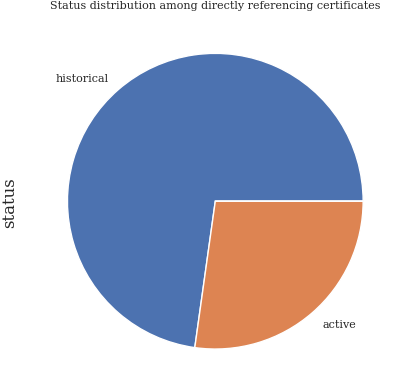

In [10]:
status_counts_df = refs_direct_eda_df["status"].value_counts()
status_counts_df.plot.pie()
plt.title("Status distribution among directly referencing certificates")

#### Direct references per type


Text(0.5, 1.0, 'Certificate type distribution among directly referencing certificates')

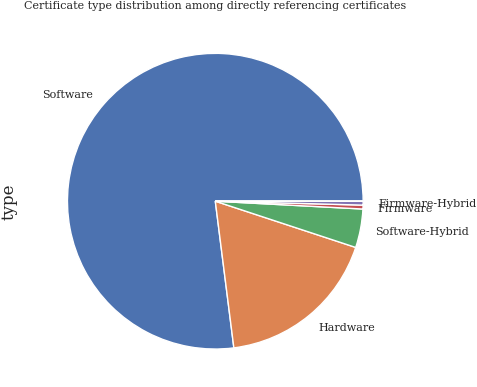

In [11]:
status_counts_df = refs_direct_eda_df["type"].value_counts()
status_counts_df.plot.pie()
plt.title("Certificate type distribution among directly referencing certificates")

#### Direct references per level

Text(0.5, 1.0, 'Certificate level distribution among directly referencing certificates')

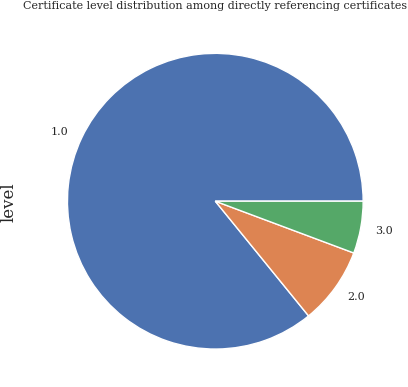

In [12]:
status_counts_df = refs_direct_eda_df["level"].value_counts()
status_counts_df.plot.pie()
plt.title("Certificate level distribution among directly referencing certificates")

#### Direct references per embodiment

Text(0.5, 1.0, 'Certificate embodiment distribution among directly referencing certificates')

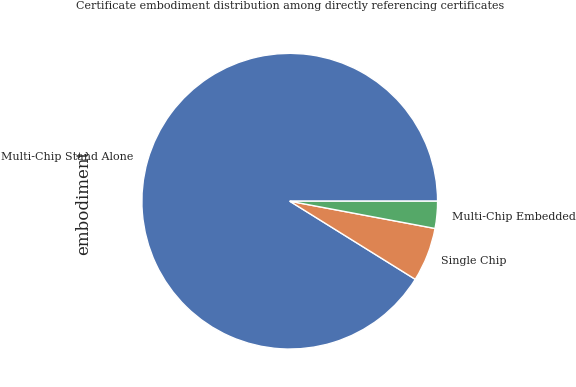

In [13]:
status_counts_df = refs_direct_eda_df["embodiment"].value_counts()
status_counts_df.plot.pie()
plt.title("Certificate embodiment distribution among directly referencing certificates")

#### Total number of assigned CVEs across embodiments

In [14]:
cve_df: DataFrame = df[df["related_cves"].notna()]
counter: Counter = Counter()

for _, cert in cve_df.iterrows():
    embodiment = cert["embodiment"]
    counter[embodiment] = counter[embodiment] + 1
    
counter

Counter({'Multi-Chip Stand Alone': 217,
         'Multi-Chip Embedded': 2,
         'Single Chip': 1})

#### Total number of assigned CVEs across levels

In [15]:
counter: Counter = Counter()

for _, cert in cve_df.iterrows():
    level = cert["level"]
    counter[level] = counter[level] + 1
    
counter

Counter({1.0: 133, 2.0: 86, 3.0: 1})

#### Total number of assigned CVEs across types

In [16]:
counter: Counter = Counter()

for _, cert in cve_df.iterrows():
    cert_type = cert["type"]
    counter[cert_type] = counter[cert_type] + 1
    
counter

Counter({'Software': 109,
         'Hardware': 96,
         'Firmware': 12,
         'Software-Hybrid': 3})

#### Total number of assigned CVEs across status


In [17]:
counter: Counter = Counter()

for _, cert in cve_df.iterrows():
    status = cert["status"]
    counter[status] = counter[status] + 1
    
counter

Counter({'active': 32, 'historical': 188})

### Statistics how many certificates reference certificate with at least one vulnerability

In [18]:
cve_ref_df: DataFrame = df[(df["related_cves"].notna()) & (df["module_directly_referenced_by"].notna())]
total_references: int = cve_ref_df["module_directly_referenced_by"].apply(len).sum()

print(f"Total number of certificates referencing at least one certificate with at least one assigned CVE: {total_references}")

Total number of certificates referencing at least one certificate with at least one assigned CVE: 81


#### The certificate with at least one CVE assigned and maximum of references from other certs

In [19]:
maximum_references: int = cve_ref_df["module_directly_referenced_by"].apply(len).max()

print(f"Maximum amount of references from the other certificates referencing the vulnerable certificate: {maximum_references}")

Maximum amount of references from the other certificates referencing the vulnerable certificate: 7


In [20]:
cve_ref_df[cve_ref_df["module_directly_referenced_by"].apply(len) == maximum_references]

,cert_id,name,status,standard,type,level,embodiment,date_validation,date_sunset,algorithms,...,related_cves,module_directly_referenced_by,module_indirectly_referenced_by,module_directly_referencing,module_indirectly_referencing,policy_directly_referenced_by,policy_indirectly_referenced_by,policy_directly_referencing,policy_indirectly_referencing,year_from
dgst,,,,,,,,,,,,,,,,,,,,,
10acb87b3040f4e1,3616,Oracle Linux 7 NSS Cryptographic Module,historical,FIPS 140-2,Software,1.0,Multi-Chip Stand Alone,2020-02-19,NaT,"{KTS#C794, AES#C794, KTS#C786, ECDSA#C786, HMA...",...,"{CVE-2016-1930, CVE-2015-3812, CVE-2015-1819, ...","{4146, 3893, 4135, 3699, 3921, 4147, 4164}","{4146, 3893, 4135, 3699, 3921, 4147, 4164}",NaN,NaN,"{3893, 3921, 3699}","{3893, 3921, 3699}",NaN,NaN,2020
3c4ee858b268931a,1336,Microsoft Windows Server 2008 R2 Cryptographic...,historical,FIPS 140-2,Software,1.0,Multi-Chip Stand Alone,2010-08-12,NaT,"{AES#1168, RSA#559, DRBG#27, Triple-DES#846, D...",...,"{CVE-2018-0973, CVE-2018-0970, CVE-2009-0093, ...","{2736, 1817, 1806, 1339, 1807, 1805, 1808}","{2736, 1817, 1806, 1339, 1807, 1805, 1808}",{1334},"{1321, 1333, 1334}","{1817, 1806, 1339, 1807, 1805, 1808}","{1817, 1806, 1339, 1807, 1805, 1808}",{1334},"{1321, 1333, 1334}",2010


### Active certificates which reference at least one historical cert

In [21]:
def get_cert_property(df: DataFrame, cert_id: int, column: str) -> str | None:
    if column not in df.columns:
        raise ValueError(f"Dataset does not have column '{column}'")
    
    sub_df = df[df["cert_id"] == int(cert_id)]
    
    if not sub_df.shape[0]:  # Certificate is not in the dataset
        print(f"Cert ID: {cert_id} not in dataset")
        return None
    
    if sub_df.shape[0] > 1:  # There are more than one occurence with same ID
        print(f"Error Cert ID: {cert_id} has {sub_df.shape[0]} occurrences.")
        return None
    
    return sub_df.iloc[0][column]

In [22]:
active_certs_referencing_historical: list[int] = []
# NOTE: "cert_id" field is represented as integer, however "module_directly_referencing" is set of strings
historical_cert_ids: set[str] = set(df[df["status"] == "historical"]["cert_id"].apply(str))
active_referencing_certs: DataFrame = refs_df[(refs_df["status"] == "active") & (refs_df["module_directly_referencing"].notna())]

for _, rows in active_referencing_certs.iterrows():
    referencing_ids = rows["module_directly_referencing"]
    intersection = referencing_ids & historical_cert_ids
    
    if intersection:
        active_certs_referencing_historical.append(rows.cert_id)

hit_ratio: float = len(active_certs_referencing_historical) / len(active_referencing_certs)
print(f"Total active certificates referencing at least one historical: {len(active_certs_referencing_historical)}")
print(f"Total active certificates referencing at least one certificate: {len(active_referencing_certs)}")
print(f"Hit ratio: {round(hit_ratio, 2)}")

Total active certificates referencing at least one historical: 12
Total active certificates referencing at least one certificate: 129
Hit ratio: 0.09


#### Active certificate referencing at least one historical certificate with assigned CVE

In [23]:
active_cert_referencing_historical_with_cves: list[tuple[int, int]] = []


for _, cert in refs_df[refs_df["cert_id"].isin(active_certs_referencing_historical)].iterrows():
    cert_id = cert["cert_id"]
    
    for referenced_cert_id in cert["module_directly_referencing"]:
        referenced_cert_id_int = int(referenced_cert_id)
        related_cves = get_cert_property(df, referenced_cert_id_int, "related_cves")
        
        if not pd.isna(related_cves):
            print(f"Active certificate {cert_id} is referencing historical certificate {referenced_cert_id} with assigned CVE")
            active_cert_referencing_historical_with_cves.append((cert_id, referenced_cert_id_int))
            

active_cert_referencing_historical_with_cves

Active certificate 3939 is referencing historical certificate 3860 with assigned CVE


[(3939, 3860)]

### Certificates with higher levels referencing certficates with lower levels

In [24]:
referencing_certs: DataFrame = refs_df[refs_df["module_directly_referencing"].notna()]
cert_level_ids: dict[int, set[str]] = {}
unique_levels: list[int] = df["level"].apply(int).unique()

for level in df["level"].unique():
    level_cert_ids: set[str] = set(df[df["level"] == level]["cert_id"].apply(str))
    cert_level_ids[int(level)] = level_cert_ids

In [25]:
def get_cert_ids_referencing_lower_level_cert(level_referencing_certs_df: DataFrame, lower_cert_ids: set[str]) -> list[int]:
    cert_ids = []
    
    for _, cert in level_referencing_certs_df.iterrows():
        if cert["module_directly_referencing"] & lower_cert_ids:
            cert_ids.append(cert["cert_id"])
    
    return cert_ids            

#### Level 2 referencing at least one certificate of level 1

In [26]:
LEVEL2: int = 2 
below_level2_cert_ids: set[str] = cert_level_ids[1]
level2_ref_certs = referencing_certs[referencing_certs["level"] == LEVEL2]
level2_referencing_lower_level = get_cert_ids_referencing_lower_level_cert(level2_ref_certs, below_level2_cert_ids)
ratio: float = len(level2_referencing_lower_level) / level2_ref_certs.shape[0]

print(f"Total amount of certificates with level {LEVEL2} referencing at least one certificate: {level2_ref_certs.shape[0]}")
print(f"Total amount of certicates with reference at least one certificate with lower level: {len(level2_referencing_lower_level)}")
print(f"Hit ratio: {round(ratio, 2)}")

Total amount of certificates with level 2 referencing at least one certificate: 40
Total amount of certicates with reference at least one certificate with lower level: 16
Hit ratio: 0.4


#### Level 3 referencing at least one certificate of level 1 or 2

In [27]:
LEVEL3: int = 3
below_level3_cert_ids = below_level2_cert_ids | cert_level_ids[2]
level3_ref_certs = referencing_certs[referencing_certs["level"] == LEVEL3]
level3_referencing_lower_level = get_cert_ids_referencing_lower_level_cert(level3_ref_certs, below_level3_cert_ids)
ratio: float = len(level3_referencing_lower_level) / level3_ref_certs.shape[0]

print(f"Total amount of certificates with level {LEVEL3} referencing at least one certificate: {level3_ref_certs.shape[0]}")
print(f"Total amount of certicates with reference at least one certificate with lower level: {len(level3_referencing_lower_level)}")
print(f"Hit ratio: {round(ratio, 2)}")

Total amount of certificates with level 3 referencing at least one certificate: 27
Total amount of certicates with reference at least one certificate with lower level: 1
Hit ratio: 0.04


#### Level 4 referencing at least one certificate of level 1, 2 or 3

In [28]:
LEVEL4: int = 4
below_level4_cert_ids = below_level3_cert_ids | cert_level_ids[3]
level4_ref_certs = referencing_certs[referencing_certs["level"] == LEVEL4]
level4_referencing_lower_level = get_cert_ids_referencing_lower_level_cert(level4_ref_certs, below_level4_cert_ids)
print(f"Total amount of certificates with level {LEVEL4} referencing at least one certificate: {level4_ref_certs.shape[0]}")

Total amount of certificates with level 4 referencing at least one certificate: 0


### Distribution of references among embodiments

In [29]:
def get_embodiment_references(refs_df: DataFrame, embodiment: str) -> dict[str, int]:
    result: dict[str, int] = {}
    sub_df = refs_df[(refs_df["embodiment"] == embodiment) & (refs_df["module_directly_referencing"].notna())]
    
    for references in sub_df["module_directly_referencing"]:
        for cert_id in references:
            referenced_embodiment: str = get_cert_property(refs_df, cert_id, "embodiment")
            result[referenced_embodiment] = result.get(referenced_embodiment, 0) + 1
    
    return result

In [30]:
final_embodiment_statistics: dict[str, dict[str, int]] = {} 

for embodiment in refs_df["embodiment"].unique():
    final_embodiment_statistics[embodiment] = get_embodiment_references(refs_df, embodiment)

pprint(final_embodiment_statistics)

{'Multi-Chip Embedded': {'Multi-Chip Embedded': 13, 'Single Chip': 2},
 'Multi-Chip Stand Alone': {'Multi-Chip Embedded': 7,
                            'Multi-Chip Stand Alone': 546,
                            'Single Chip': 28},
 'Single Chip': {'Multi-Chip Embedded': 2,
                 'Multi-Chip Stand Alone': 1,
                 'Single Chip': 28}}


Text(0.5, 1.0, 'Direct references among FIPS embodiments')

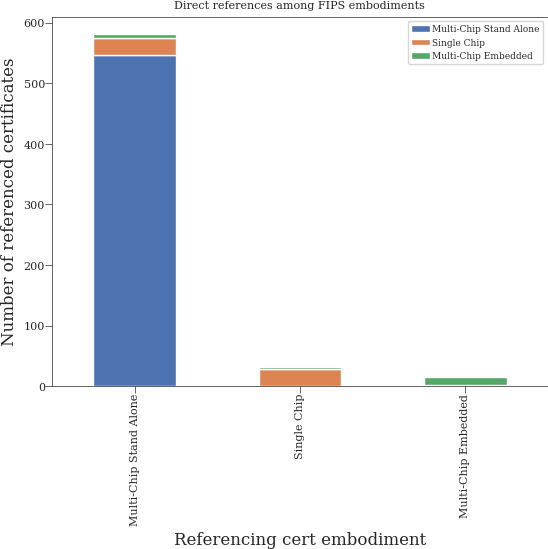

In [31]:
embodiment_df = pd.DataFrame(final_embodiment_statistics).fillna(0).astype(int).transpose()
embodiment_df.plot(kind="bar", stacked=True)

plt.xlabel("Referencing cert embodiment")
plt.ylabel("Number of referenced certificates")
plt.title("Direct references among FIPS embodiments")

### Distribution of references among types

In [32]:
def get_type_references(refs_df: DataFrame, cert_type: str) -> dict[str, int]:
    result = {}
    sub_df = refs_df[(refs_df["type"] == cert_type) & (refs_df["module_directly_referencing"].notna())]
    
    for references in sub_df["module_directly_referencing"]:
        for cert_id in references:
            referenced_type: str = get_cert_property(refs_df, cert_id, "type")
            result[referenced_type] =result.get(referenced_type, 0) + 1

    return result

In [33]:
final_type_statistics: dict[str, dict[str, int]] = {}

for cert_type in refs_df["type"].unique():
    final_type_statistics[cert_type] = get_type_references(refs_df, cert_type)

pprint(final_type_statistics)

{'Firmware': {'Firmware': 1, 'Hardware': 1},
 'Firmware-Hybrid': {'Hardware': 2},
 'Hardware': {'Firmware': 2,
              'Firmware-Hybrid': 2,
              'Hardware': 76,
              'Software': 9},
 'Hybrid': {},
 'Software': {'Firmware': 1,
              'Hardware': 1,
              'Software': 502,
              'Software-Hybrid': 3},
 'Software hybrid': {},
 'Software-Hybrid': {'Hardware': 5, 'Software': 6, 'Software-Hybrid': 16}}


Text(0.5, 1.0, 'Direct references among FIPS certificate types')

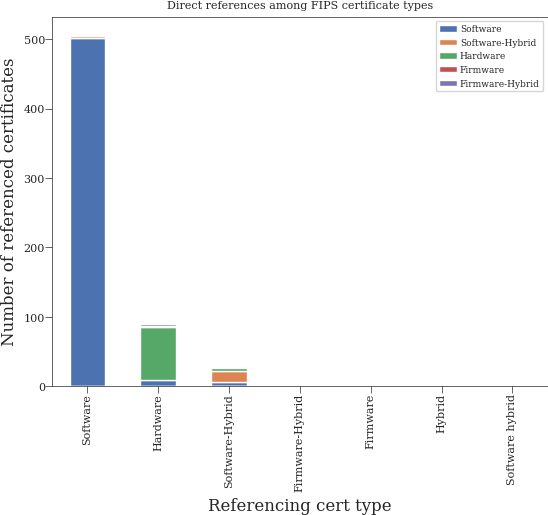

In [34]:
cert_type_df = pd.DataFrame(final_type_statistics).fillna(0).astype(int).transpose()
cert_type_df.plot(kind="bar", stacked=True)

plt.xlabel("Referencing cert type")
plt.ylabel("Number of referenced certificates")
plt.title("Direct references among FIPS certificate types")

### Cross-references among certificates

Certificate A directly references certificate B and at the same time certificate B directly references certificate A.
In other words intersection of `module_directly_referenced_by` and `module_directly_referencing` results into discovery of cross references in the dataset.

In [35]:
result: list[tuple[int, int]] = []
cross_references_df: DataFrame = df[(df["module_directly_referenced_by"].notna()) & (df["module_directly_referencing"].notna())]


for _, cert in cross_references_df.iterrows():
    referenced_by = cert["module_directly_referenced_by"]
    referencing = cert["module_directly_referencing"]
    cert_id = cert["cert_id"]
    
    intersection: set[str] = referenced_by & referencing
    
    
    for another_cert_id in intersection:
        another_cert_id_int = int(another_cert_id)
        
        if not (another_cert_id_int, cert_id) in result:
            result.append((cert_id, int(another_cert_id)))

print(result)
# TODO - Investigate how are 3382, 3383, 3384 related

[(3384, 3382), (3382, 3383), (80, 63)]


In [36]:
df[df["cert_id"].isin([3382, 3383, 3384])]

,cert_id,name,status,standard,type,level,embodiment,date_validation,date_sunset,algorithms,...,related_cves,module_directly_referenced_by,module_indirectly_referenced_by,module_directly_referencing,module_indirectly_referencing,policy_directly_referenced_by,policy_indirectly_referenced_by,policy_directly_referencing,policy_indirectly_referencing,year_from
dgst,,,,,,,,,,,,,,,,,,,,,
6ef02a389c6415e7,3384,Delta Cryptographic Module,active,FIPS 140-2,Hardware,1.0,Multi-Chip Embedded,2019-03-27,2024-03-26,"{DRBG#2285, AES#5656, ECDSA#1529, SHS#4536, KT...",...,NaN,{3382},"{3383, 3384, 3382}",{3382},"{3383, 3384, 3382}",{3382},"{3383, 3384, 3382}",{3382},"{3383, 3384, 3382}",2019
a080dde530fce451,3382,Titan Chip,active,FIPS 140-2,Hardware,1.0,Single Chip,2019-03-22,2024-03-21,"{SHS#4536, ECDSA#1529, SHS#4537, RSA#3045}",...,NaN,"{3383, 3384}","{3383, 3384, 3382}","{3383, 3384}","{3383, 3384, 3382}","{3383, 3384}","{3383, 3384, 3382}","{3383, 3384}","{3383, 3384, 3382}",2019
efb092e03612f568,3383,River Cryptographic Module,active,FIPS 140-2,Hardware,1.0,Multi-Chip Embedded,2019-03-22,2024-03-21,"{DRBG#2285, AES#5656, ECDSA#1529, SHS#4536, KT...",...,NaN,{3382},"{3383, 3384, 3382}",{3382},"{3383, 3384, 3382}",{3382},"{3383, 3384, 3382}",{3382},"{3383, 3384, 3382}",2019


### Certificate overview

In [37]:
CHOSEN_CERT_COLOR: str = "lightgreen"
REFERENCING_COLOR: str = "lightblue"
REFERENCED_BY_COLOR: str = "red"

In [38]:
cert_id: int = 4512  # Enter the certificate ID you are interested in

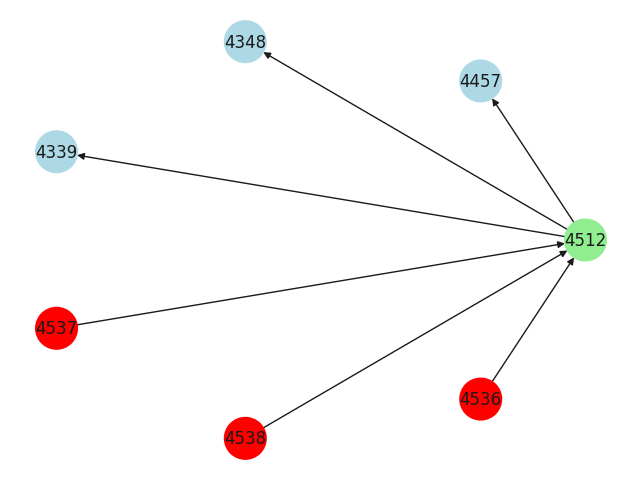

In [39]:
# TODO - Enrich graph with additional information (e.g. assigned CVEs to certificate, active/historical)
refs_df: DataFrame = df[df["module_directly_referencing"].notna()]

if not refs_df[refs_df["cert_id"] == cert_id].shape[0]:
    print("Cert ID is not in the dataset, or does not references any other certificates")
    sys.exit()

cert_id_series: Series = refs_df[refs_df["cert_id"] == cert_id].iloc[0]
cert_dgst: str = refs_df[refs_df["cert_id"] == cert_id].index[0]
color_map: list[str] = [CHOSEN_CERT_COLOR]
graph: nx.DiGraph = nx.DiGraph()
graph.add_node(cert_id)

# Display which certificates are directly referenced by the chosen certificate
for referenced_cert_id in cert_id_series["module_directly_referencing"]:
    graph.add_node(referenced_cert_id)
    graph.add_edge(cert_id, referenced_cert_id)
    color_map.append(REFERENCING_COLOR)


# Display which certificates are directly referencing the chosen certificate
for referencing_cert_id in cert_id_series["module_directly_referenced_by"]:
    graph.add_node(referencing_cert_id)
    graph.add_edge(referencing_cert_id, cert_id)
    color_map.append(REFERENCED_BY_COLOR)


pos = nx.circular_layout(graph)
nx.draw(graph, pos, arrows=True, node_color=color_map, with_labels=True, node_size=900)

In [40]:
print(f"Certificate with id {cert_id}:")
print(f" - references the certificates {cert_id_series['module_directly_referencing']}")
print(f" - is referenced by certificates {cert_id_series['module_directly_referenced_by']}")
print(f" - its page is at https://seccerts.org/fips/{cert_dgst}/")

Certificate with id 4512:
 - references the certificates {'4457', '4348', '4339'}
 - is referenced by certificates {'4537', '4538', '4536'}
 - its page is at https://seccerts.org/fips/033581b0970477af/


### Graph of the most referenced certificate

In [91]:
NODE_COLORS: dict[str, str] = {
    "active": "lightblue",
    "historical": "red",
    "revoked": "blue",
}

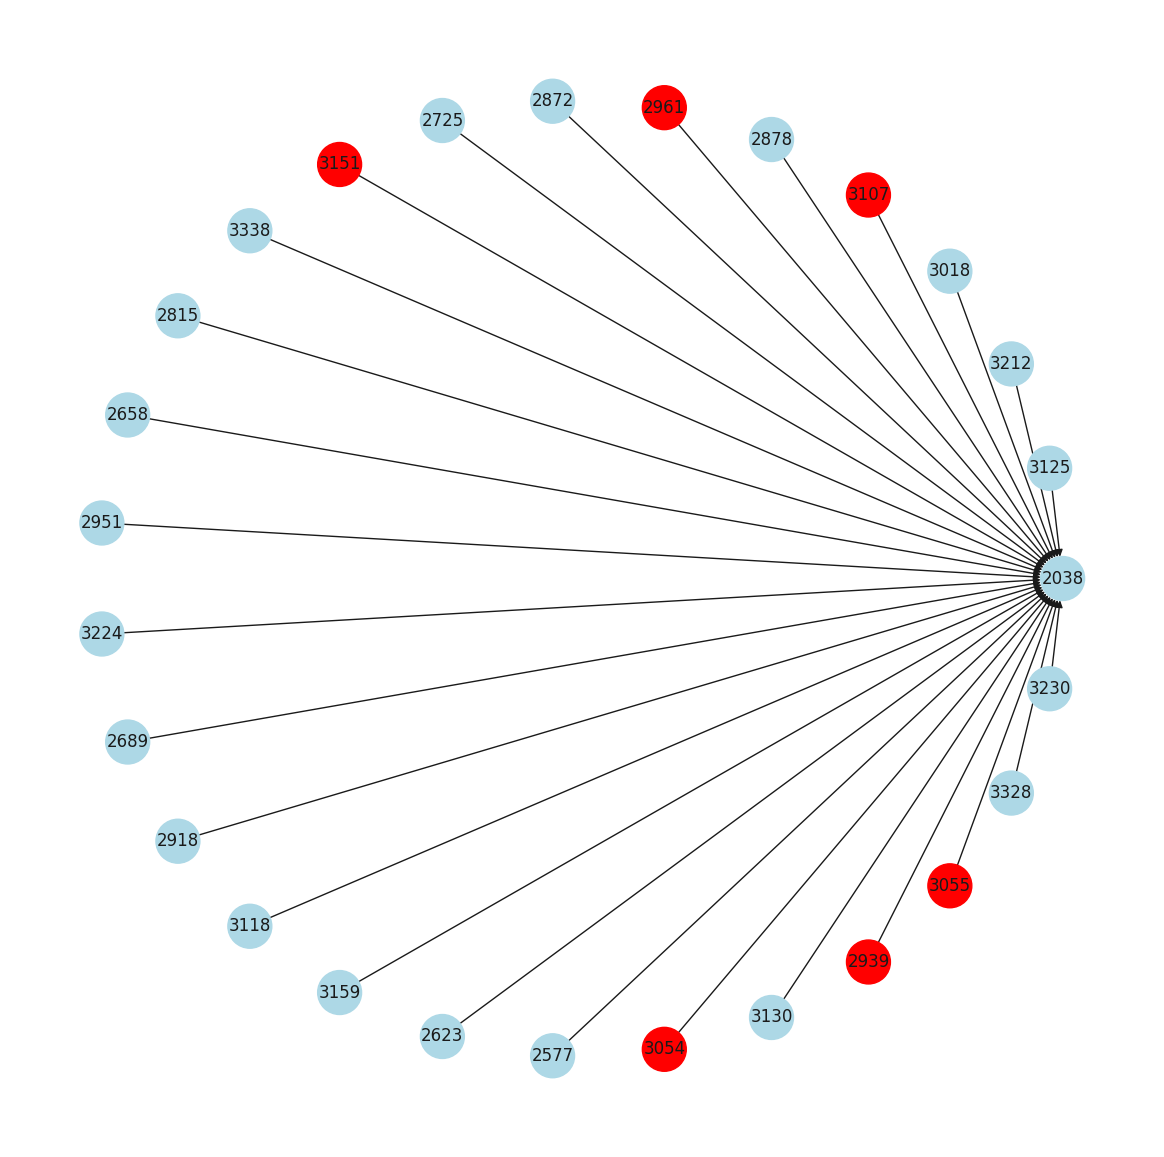

In [102]:
# TODO - Enrich the graph nodes with assigned CVEs
# TODO - Refactor me please
graph = nx.DiGraph()
color_map: list[str] = []
referenced_by_df: DataFrame = df[df["module_directly_referenced_by"].notna()]
max_referenced_by_num: int = referenced_by_df["module_directly_referenced_by"].apply(len).max()
most_referenced_certificate: Series = referenced_by_df[referenced_by_df["module_directly_referenced_by"].apply(len) == max_referenced_by_num].iloc[0]

cert_id: int = most_referenced_certificate["cert_id"]
cert_status: str = most_referenced_certificate["status"]
graph.add_node(cert_id)
color_map.append(NODE_COLORS[cert_status])
    
for cert_id_str in most_referenced_certificate["module_directly_referenced_by"]:
    cert_id_int = int(cert_id_str)
    graph.add_node(cert_id_int)
    graph.add_edge(cert_id_int, cert_id)
    cert_status: str = get_cert_property(df, cert_id_int, "status")
    color_map.append(NODE_COLORS[cert_status])

fig, ax = plt.subplots(figsize=(15, 15))
pos = nx.circular_layout(graph)
nx.draw(graph, pos, node_color=color_map, arrows=True, with_labels=True, node_size=1000)
plt.show()

### Graph of the most referencing certitificate

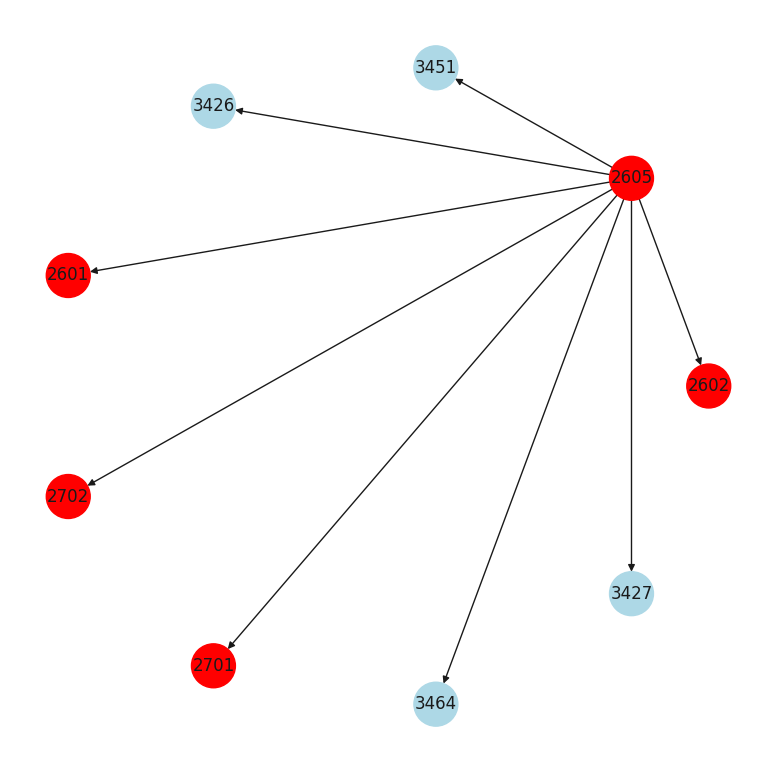

In [108]:
# TODO - Enrich the graph nodes with assigned CVEs
# TODO - Refactor me please
graph = nx.DiGraph()
color_map: list[str] = []
referencing_df: DataFrame = df[df["module_directly_referencing"].notna()]
most_references_num: int = referencing_df["module_directly_referencing"].apply(len).max()
most_referencing_cert: Series = referencing_df[referencing_df["module_directly_referencing"].apply(len) == most_references_num].iloc[0]
cert_id: int = most_referencing_cert["cert_id"]
cert_status: str = most_referencing_cert["status"]
color_map.append(NODE_COLORS[cert_status])


for cert_id_str in most_referencing_cert["module_directly_referencing"]:
    cert_id_int = int(cert_id_str)
    graph.add_node(cert_id_int)
    graph.add_edge(cert_id, cert_id_int)
    cert_status: str = get_cert_property(df, cert_id_int, "status")
    color_map.append(NODE_COLORS[cert_status])

    
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.circular_layout(graph)
nx.draw(graph, pos, node_color=color_map, arrows=True, with_labels=True, node_size=1000)
plt.show()